# Y-DATA PS4DS Homework 2 - Programming - Version 2
#### November 7, 2024

In [1]:
import random
from typing import List
import numpy as np
from scipy.stats import binom, geom
import matplotlib.pyplot as plt
from numpy.random import choice

In [2]:
# Set the seed for reproducibility!
random.seed(42)
np.random.seed(42)

## Question 1

Consider independent Bernoulli trials that each has the same probability $p$ of success.
For each of the following questions, create a plot that has $p$ on the x-axis and the required value on the y-axis.
* What is the probability of at least $7$ successes in $20$ trials?
* What is the probability of exactly $7$ successes in $20$ trials?
* Let $X$ be the number of trials until the first success (say, if the first success was on the fourth trial, then $X = 4$). What is the probability that $X = 20$?
* What is the expected number of trials until the first success?

NOTE: in Version $1$ of this exercise, $X$ was defined as the number of trials until the $7$th success,
and in the last part of this question you were asked to calculate the expected number of trials until the seventh success.
Answering the questions in Version $1$ is also acceptable.

HINT: You can use [scipy.stats.binom](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html)
and [scipy.stats.geom](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html) for the calculations.
The plots can be generated using [matplotlib](https://matplotlib.org/stable/users/explain/quick_start.html#a-simple-example).
The following is an example code snippet to generate a plot:
```python
x_values = [1, 2, 3, 4, 5]
y_values = [1, 4, 9, 16, 25]
plt.title("Example title")
plt.xlabel("Example X-axis label")
plt.ylabel("Example Y-axis label")
plt.plot(x_values, y_values)
plt.show()
```


In [3]:
# Your code here
from scipy.stats import binom
from scipy.stats import geom

In [4]:
def binom_exact(success, trials, prob):
    return success, binom.pmf(success, trials, prob)    

In [17]:
def Binomial(success, trials, prob):
    x = []
    y = []
    for i in range(success, trials):
        x.append(i)
        y.append(binom.pmf(i, trials, prob))
    return x, y    

In [18]:
def geom_func(success, prob):
    return success, geom.pmf(success, prob)

In [19]:
x,y = Binomial(7, 20, 0.25)

In [20]:
z,w = binom_exact(7, 20, 0.25)

In [21]:
a,b = geom_func(20, 0.25)

In [22]:
prob = 0.25

In [23]:
geom.expect(args =(prob,))

3.9999999999999925

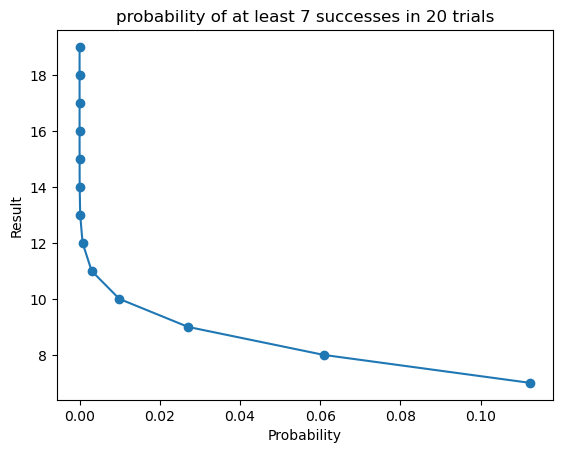

In [24]:
plt.title("probability of at least 7 successes in 20 trials")
plt.xlabel("Probability")
plt.ylabel("Result")
plt.plot(y, x, marker = 'o')
plt.show()

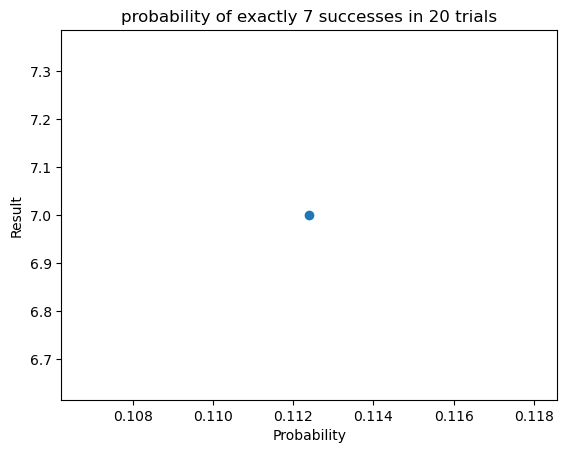

In [25]:
plt.title("probability of exactly 7 successes in 20 trials")
plt.xlabel("Probability")
plt.ylabel("Result")
plt.plot(w, z, marker = 'o')
plt.show()

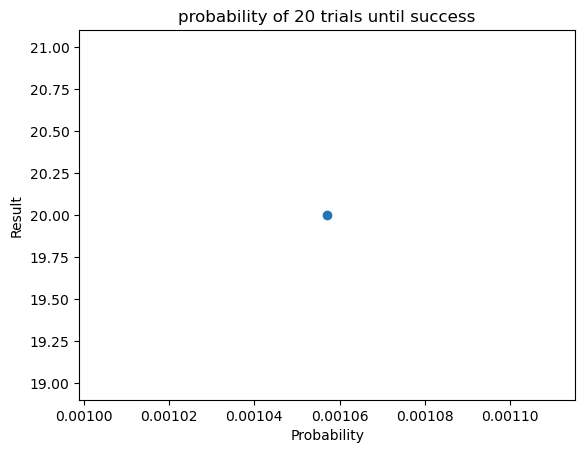

In [26]:
plt.title("probability of 20 trials until success")
plt.xlabel("Probability")
plt.ylabel("Result")
plt.plot(b, a, marker = 'o')
plt.show()

## Question 2

In this task you will simulate a simple slot machine.
Each time the slot machine is played, an outcome is chosen and some payout is awarded.
Given two `lists` representing the probabilities of each outcome and the payouts for each outcome, write a class `SlotMachine` that has the following methods:
- `play()`: returns the payout for the outcome.
- `expected_payout()`: returns the expected payout of the slot machine.
- `variance()`: returns the variance of the payout of the slot machine.


In [35]:
class SlotMachine:
    def __init__(self, probs: List[float], payouts: List[float]):
        """
        Initialize the slot machine.

        Parameters
        ----------
            probs : List[float]
                List of probabilities for each outcome.
            payouts : List[float]
                List of payouts for each outcome.
        """
        # It can be reasonable to check that the inputs are all lists of the same length,
        # that the probabilities are all positive and sum to 1, etc.
        # That is omitted for this exercise.
        self.probs = probs
        self.payouts = payouts
        
    
    def play(self) -> float:
        """
        Play the slot machine.

        Returns
        -------
            float
                Payout for the outcome.
        """
        # Your code here
        return choice(self.payouts, p = self.probs)
    
    def expected_payout(self) -> float:
        """
        Calculate the expected payout of the slot machine.

        Returns
        -------
            float
                Expected payout.
        """
        # Your code here
        return np.sum(np.dot(self.payouts,self.probs))
    
    def variance(self) -> float:
        """
        Calculate the variance of the payout of the slot machine.

        Returns
        -------
            float
                Variance of the payout.
        """
        # Your code here
        return np.dot((self.payouts - np.sum(np.dot(self.payouts,self.probs)))**2, self.probs)

In [36]:
# Example usage
slot_machine = SlotMachine(probs=[0.5, 0.3, 0.2], payouts=[10, 5, 0])
print(slot_machine.play())
print(slot_machine.expected_payout())
print(slot_machine.variance())

10
6.5
15.25


For the slot machine with probabilities `[0.5, 0.3, 0.2]` and payouts `[10, 5, 0]`, run the `play()` method 10000 times and print the average payout:

In [30]:
# Your code here
def SlotMachineNTimes(n, probs, payouts):
    slot_machine = SlotMachine(probs, payouts)
    sum = 0
    for i in range(n):
        sum += slot_machine.play()
    return sum/n

In [31]:
SlotMachineNTimes(10000, [0.5, 0.3, 0.2], [10, 5, 0])

6.558

## Question 3

Reproduce the two plots from slide 68 of the lecture notes: plot the CDF and PDF of the continuous uniform distributions $U(-2, 2)$, $U(0, 1)$, $U(1, 3)$ and $U(-1, 1)$. For each one of the distributions, what is the probability of drawing a number equal or less than $0$?
 

In [32]:
# Your code here
from scipy.stats import uniform

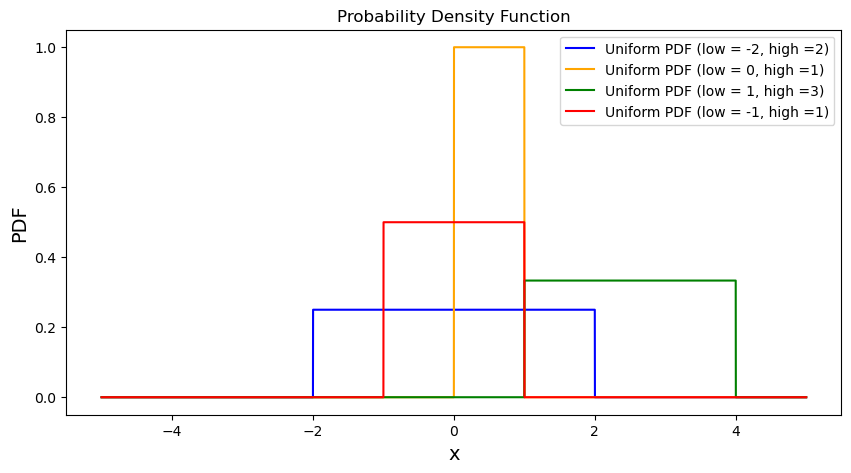

In [33]:
plt.figure(figsize=(10, 5))
plt.title("Probability Density Function")

x = np.arange(-5, 5, 0.001)
plt.plot(x, uniform.pdf(x, loc=-2, scale=4), color="blue")
plt.plot(x, uniform.pdf(x, loc=0, scale=1), color="orange")
plt.plot(x, uniform.pdf(x, loc=1, scale=3), color="green")
plt.plot(x, uniform.pdf(x, loc=-1, scale=2), color="red")

plt.legend(["Uniform PDF (low = -2, high =2)", "Uniform PDF (low = 0, high =1)", "Uniform PDF (low = 1, high =3)", "Uniform PDF (low = -1, high =1)"])

plt.ylim(-0.05, 1.05)


plt.xlabel("x", fontsize =14)
plt.ylabel("PDF", fontsize =14)
plt.show()

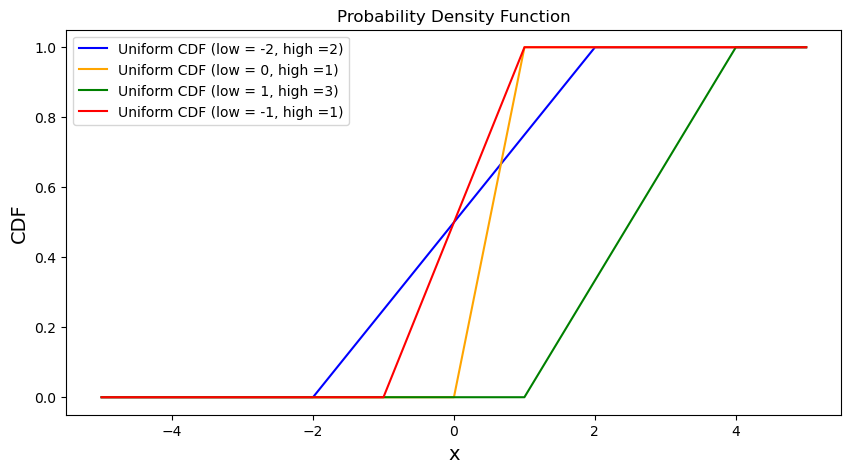

In [34]:
plt.figure(figsize=(10, 5))
plt.title("Probability Density Function")

x = np.arange(-5, 5, 0.001)
plt.plot(x, uniform.cdf(x, loc=-2, scale=4), color="blue")
plt.plot(x, uniform.cdf(x, loc=0, scale=1), color="orange")
plt.plot(x, uniform.cdf(x, loc=1, scale=3), color="green")
plt.plot(x, uniform.cdf(x, loc=-1, scale=2), color="red")

plt.legend(["Uniform CDF (low = -2, high =2)", "Uniform CDF (low = 0, high =1)", "Uniform CDF (low = 1, high =3)", "Uniform CDF (low = -1, high =1)"])

plt.ylim(-0.05, 1.05)


plt.xlabel("x", fontsize =14)
plt.ylabel("CDF", fontsize =14)
plt.show()

for X ~ U(-2,2) P(X<=0) = 0.5
for X ~ U(0,1) P(X<=0) = 0
for X ~ U(1,3) P(X<=0) = 0
for x ~ U(-1,1) P(X<=0) = 0.67